# U.S. Medical Insurance Costs

In [2]:
from matplotlib import pyplot as plt
import csv
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
dff = pd.read_csv('insurance.csv')
dff.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## We will use a multiple linear regression model because of the multiple variables that influence the charges.

In [4]:


# multiple linear regressoin model
mlr = LinearRegression()


## Converting Categorical Variables into Dummy Varibles in order to compute the values.

In [5]:
dff['is_male'] = dff['sex'].apply(lambda x: 1 if x == 'male' else 0)
dff['is_female'] = dff['sex'].apply(lambda x: 1 if x == 'female' else 0)
dff['southwest'] = dff['region'].apply(lambda x: 1 if x == 'southwest' else 0)
dff['southeast'] = dff['region'].apply(lambda x: 1 if x == 'southeast' else 0)
dff['northwest'] = dff['region'].apply(lambda x: 1 if x == 'northwest' else 0)
dff['northeast'] = dff['region'].apply(lambda x: 1 if x == 'northeast' else 0)
dff['is_smoker'] = dff['smoker'].apply(lambda x: 1 if x == 'yes' else 0)

dff.head(10)

,age,sex,bmi,children,smoker,region,charges,is_male,is_female,southwest,southeast,northwest,northeast,is_smoker
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,1,0,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0,0,1,0,0,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0,0,1,0,0,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0,0,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0,0,0,1,0,0
5,31,female,25.740,0,no,southeast,3756.62160,0,1,0,1,0,0,0
6,46,female,33.440,1,no,southeast,8240.58960,0,1,0,1,0,0,0
7,37,female,27.740,3,no,northwest,7281.50560,0,1,0,0,1,0,0
8,37,male,29.830,2,no,northeast,6406.41070,1,0,0,0,0,1,0
9,60,female,25.840,0,no,northwest,28923.13692,0,1,0,0,1,0,0


These are the coefficient of the variables
[[  -98.30251724   345.21530565    98.30251724   465.98025996
    251.29111226 23540.74666667  -364.61260791  -331.46692688
    -24.32999771   720.4095325 ]]
This is the y-intercept
[-12553.89465827]
This is how much I would have to pay
1111.6802831472924


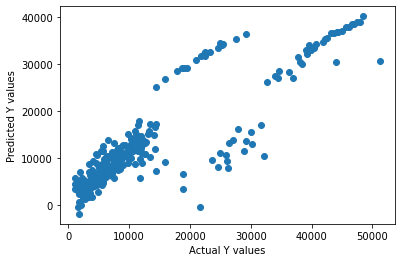

0.7467955093844898
0.763817072982393


In [10]:
# Our Y variable for the training will be the charges

# Our X variables that influence the Y variable will be sex, age, bmi, # of children,
# smoker, and region
y = dff[['charges']]
x = dff[['is_male','bmi',
       'is_female','children',
       'age','is_smoker',
       'southwest','southeast',
       'northwest','northeast']]
# Use 80 percent of the data for training and 20 percent for testing
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2,random_state = 7)
mlr.fit(x_train, y_train)


y_predicted = mlr.predict(x_test)
erick = [[1,27,0,0,19,0,0,1,0,0]]
print('These are the coefficient of the variables')
print(mlr.coef_)
print('This is the y-intercept')
print(mlr.intercept_)
print('This is how much I would have to pay')
print(mlr.predict(erick)[0][0])

plt.scatter(y_test, y_predicted)
plt.xlabel('Actual Y values')
plt.ylabel('Predicted Y values')

plt.show()


# R squared values
print(mlr.score(x_train, y_train))
print(mlr.score(x_test, y_test))